# Neural Network Based Embeddings 

Because relationships in natural language are complex and nonlinear, deep learning models have quickly emerged as an alternative to counting based techniques to generate embeddings.

## Word2Vec

Word2Vec is one of those neural networks based methods that generates embeddings from tokenized, processed text. Various Word2Vec implementations leverage different architecture for the networks, but two common ones are the **Continuous Bag of Words (CBOW)** architecture and the **skip-gram** architecture. 

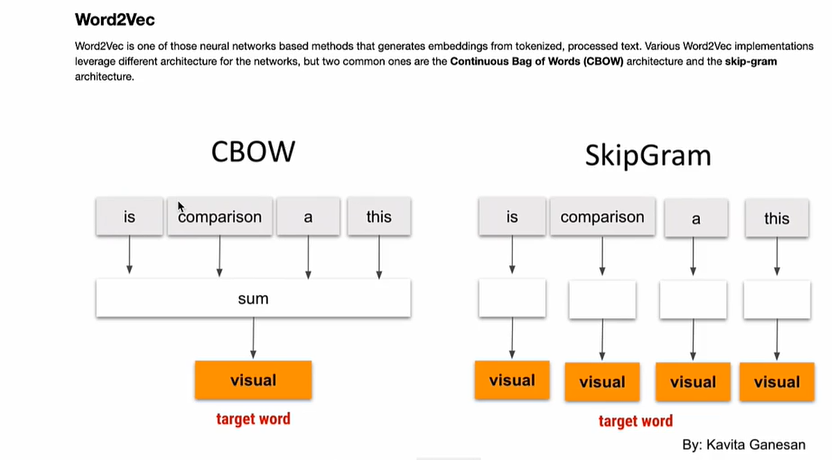

## CBOW vs. Skip Gram


 CBOW, a feed forward neural network, selects a target and uses distributed representations of the context surrounding the target to predict the target word. The skip-gram architecture is a bit simpler with one hidden layer and strives to predict the probability of a word being present given various inputs. Conceptually, it reverses the input and output of the CBOW approach. The current word is taken as input to the model and it attempts to predict the context around the input word. 


`pip install gensim`

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [1]:
corpus = f"Hey! I'm new in town. Can you please point me in the direction of the groccery store where i can get some juice and puffs made out of eggs , thank you!!"

In order to pre-process our data for the `Word2Vec` model, we'll first need to tokenize the corpus by sentence then by word. 

In [4]:
# Tokenize by sentence and word 
data = []

for i in sent_tokenize(corpus):
    temp = []
    
    for j in word_tokenize(i):
        temp.append(j.lower())
        
    data.append(temp)

data[:2]

[['hey', '!'], ['i', "'m", 'new', 'in', 'town', '.']]

After we've tokenized, we can train a `Word2Vec` model using the small corpus above. Training this model will allow for simliarty calcuations downstream

In [5]:
# Train Word2Vec using CBOW
cbow = Word2Vec(data, min_count=1, vector_size=100, window=5, sg=0)

The `Word2Vec` class has several parameters.
- The `min_count` parameter will ignore any words with less than a single frequency. 
- The `vector_size` parameter limits the dimensionality of the feature vector
- The `window` parameter maps the max distance between the current and predicted word within a sentence 
- The `sg` parameter controls algorithm. Setting `sg=0` means the CBOW is used, while `sg=1` means that the Skip-Gram algorithm is used 

Read more about the various parameters [here](https://tedboy.github.io/nlps/_modules/gensim/models/word2vec.html#Word2Vec)

In [6]:
# Train Word2Vec using Skip Gram
skip_gram = Word2Vec(data, min_count=1, vector_size=100, window=5, sg=1)

In [7]:
# Calculate similarities 
cbow_similarity = cbow.wv.similarity("groccery", "juice")
skip_gram_similarity = skip_gram.wv.similarity("eggs", "puffs")

# Print results
print(f"Cosine similarity between `groccery` and `juice` using CBOW Model: {cbow_similarity}")
print(f"Cosine similarity between `eggs` and `puffs` using Skip Gram Model: {skip_gram_similarity}")

Cosine similarity between `groccery` and `juice` using CBOW Model: 0.007412679493427277
Cosine similarity between `eggs` and `puffs` using Skip Gram Model: -0.12235210090875626


Since our corpus is so small, it's likely that these values will be very similar. As the data grows, the `Word2Vec` model is able to pick up on nuances between words. 